/var/folders/mw/hlsvk_tj67lbvwvc4sxq26rw0000gn/T/ipykernel_18208/3716658906.py:98: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', len(files))


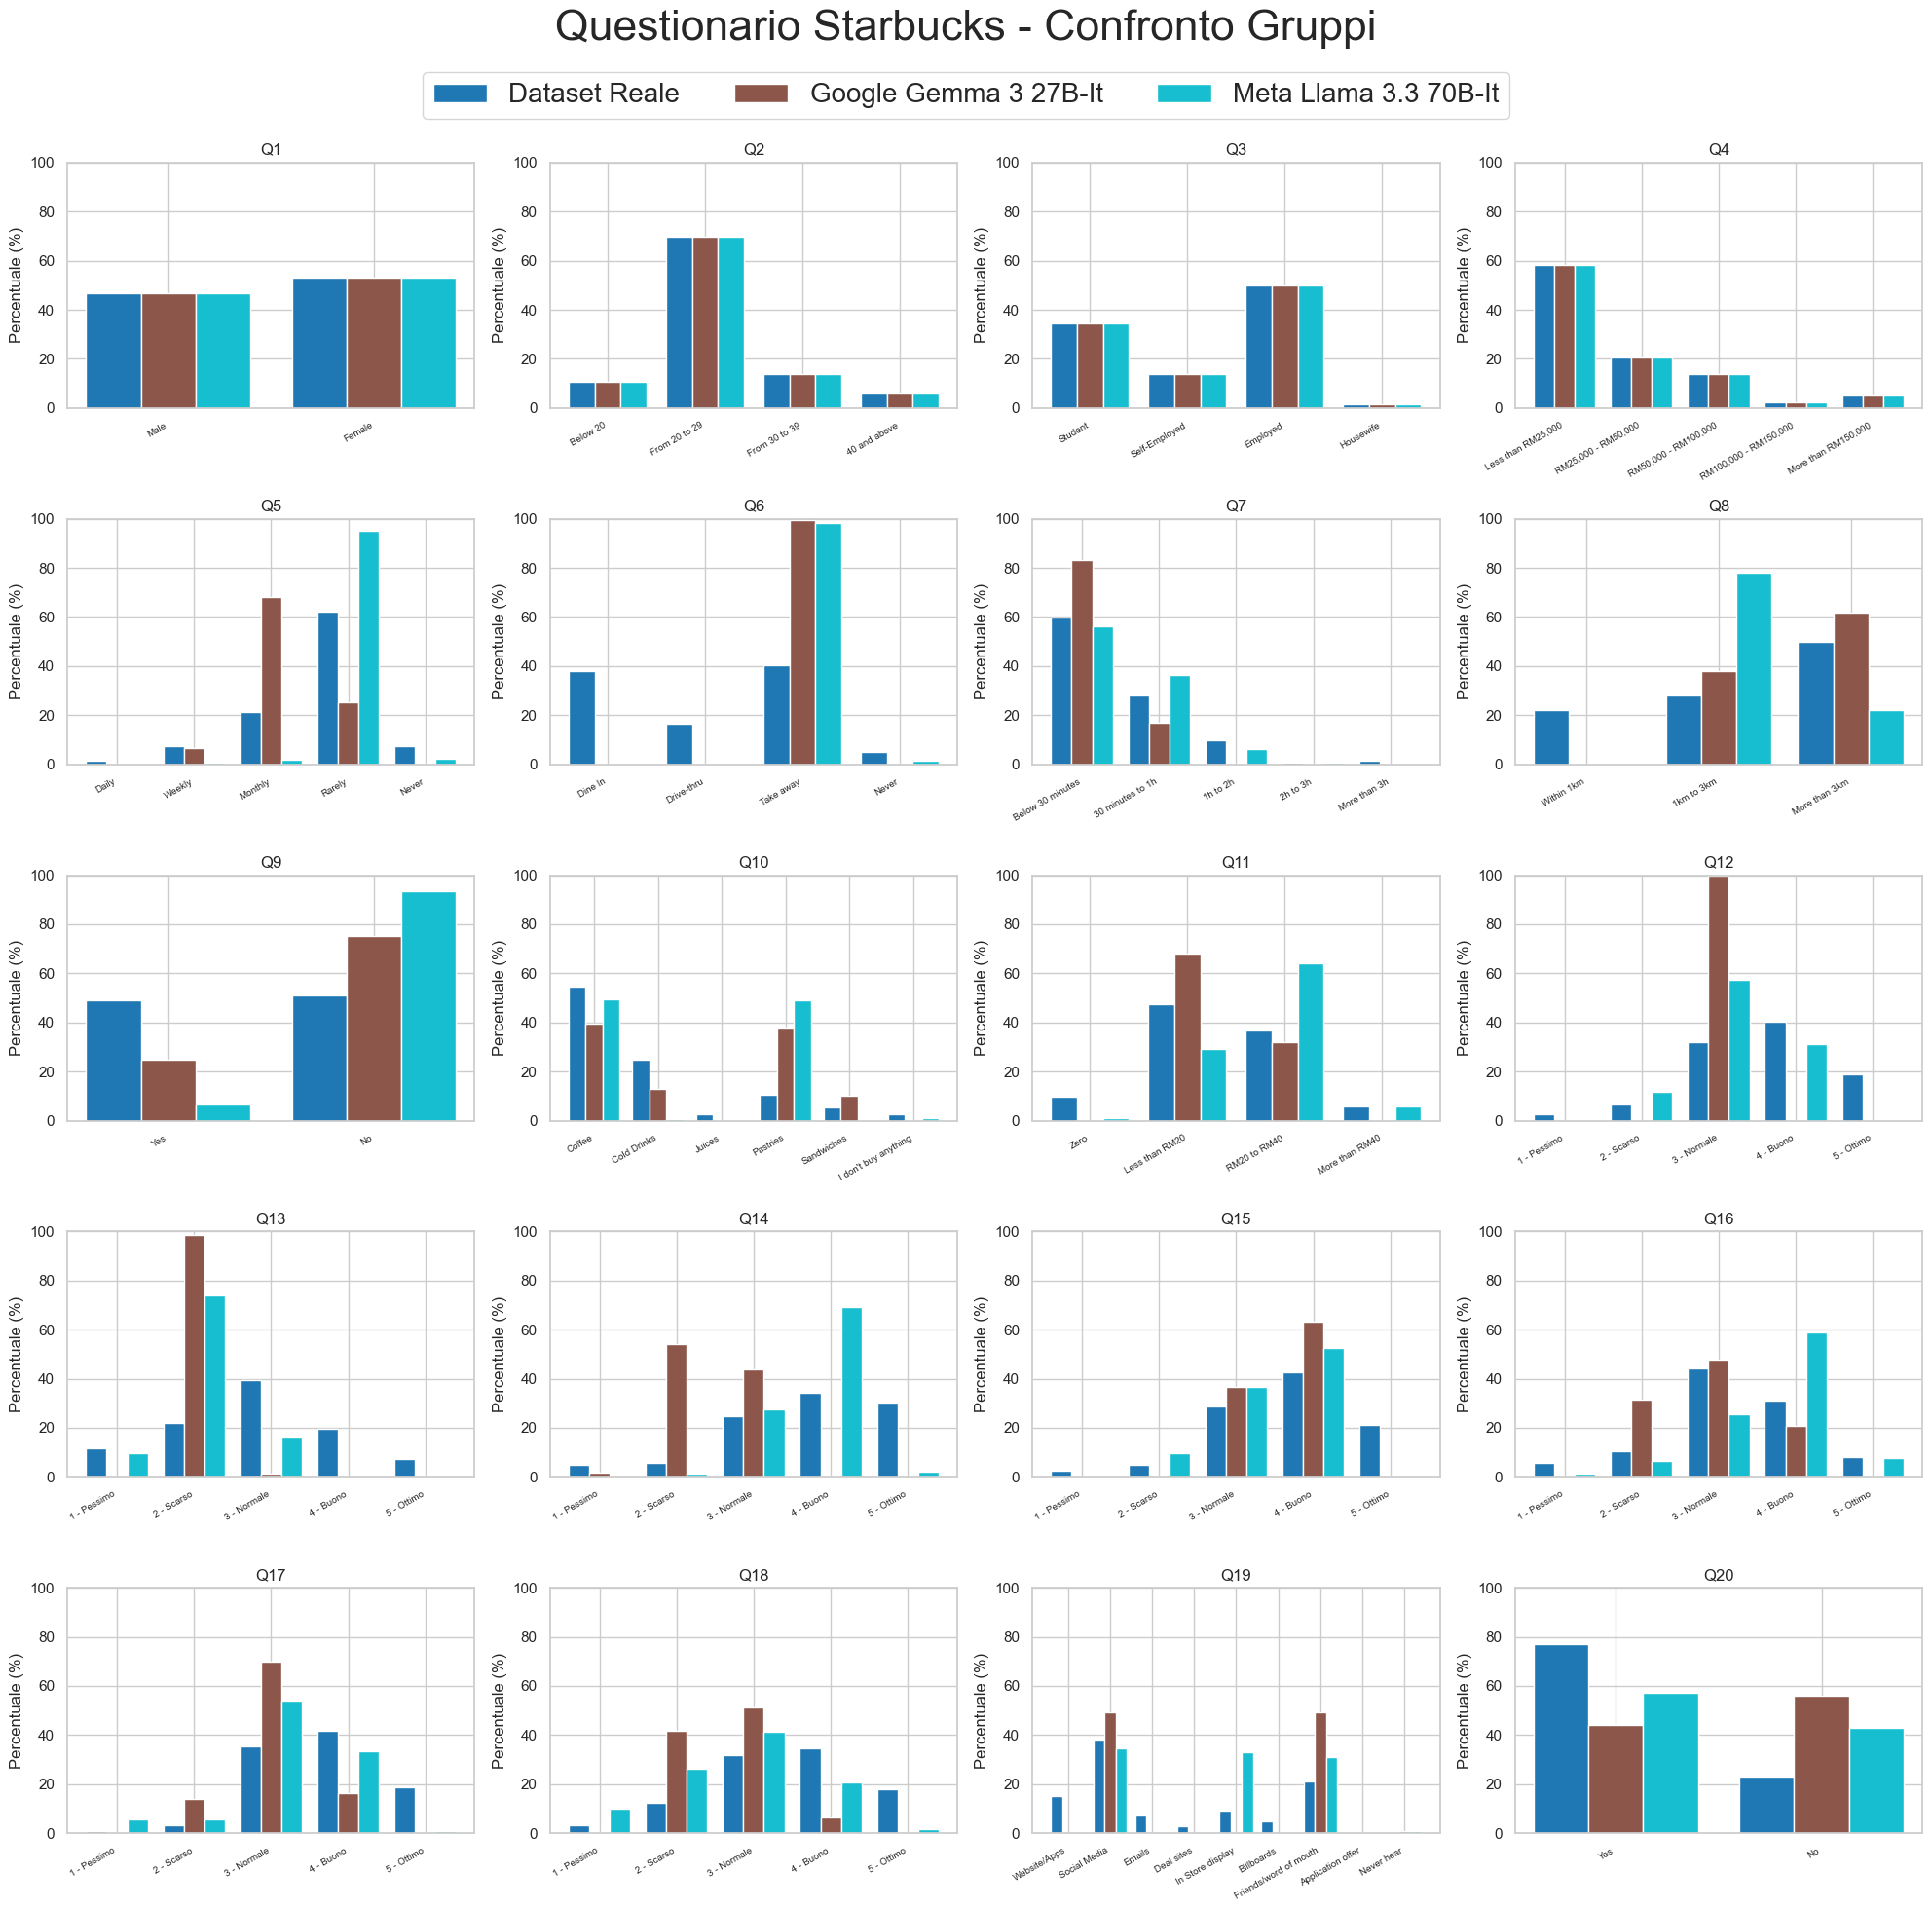

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Mappature risposte numeriche -> testo
mappings = {
    "Q1": {0: "Male", 1: "Female"},
    "Q2": {0: "Below 20", 1: "From 20 to 29", 2: "From 30 to 39", 3: "40 and above"},
    "Q3": {0: "Student", 1: "Self-Employed", 2: "Employed", 3: "Housewife"},
    "Q4": {
        0: "Less than RM25,000", 1: "RM25,000 - RM50,000",
        2: "RM50,000 - RM100,000", 3: "RM100,000 - RM150,000", 4: "More than RM150,000"
    },
    "Q5": {0: "Daily", 1: "Weekly", 2: "Monthly", 3: "Rarely", 4: "Never"},
    "Q6": {0: "Dine In", 1: "Drive-thru", 2: "Take away", 3: "Never"},
    "Q7": {0: "Below 30 minutes", 1: "30 minutes to 1h", 2: "1h to 2h", 3: "2h to 3h", 4: "More than 3h"},
    "Q8": {0: "Within 1km", 1: "1km to 3km", 2: "More than 3km"},
    "Q9": {0: "Yes", 1: "No"},
    "Q10": {0: "Coffee", 1: "Cold Drinks", 2: "Juices", 3: "Pastries", 4: "Sandwiches", 5: "I don't buy anything"},
    "Q11": {0: "Zero", 1: "Less than RM20", 2: "RM20 to RM40", 3: "More than RM40"},
    "Q19": {
        0: "Website/Apps", 1: "Social Media", 2: "Emails", 3: "Deal sites",
        4: "In Store display", 5: "Billboards", 6: "Friends/word of mouth",
        7: "Application offer", 8: "Never hear"
    },
    "Q20": {0: "Yes", 1: "No"}
}

scala_1_5 = {1: "1 - Pessimo", 2: "2 - Scarso", 3: "3 - Normale", 4: "4 - Buono", 5: "5 - Ottimo"}

categories = {
    "Q1": ["Male", "Female"],
    "Q2": ["Below 20", "From 20 to 29", "From 30 to 39", "40 and above"],
    "Q3": ["Student", "Self-Employed", "Employed", "Housewife"],
    "Q4": ["Less than RM25,000", "RM25,000 - RM50,000", "RM50,000 - RM100,000", "RM100,000 - RM150,000", "More than RM150,000"],
    "Q5": ["Daily", "Weekly", "Monthly", "Rarely", "Never"],
    "Q6": ["Dine In", "Drive-thru", "Take away", "Never"],
    "Q7": ["Below 30 minutes", "30 minutes to 1h", "1h to 2h", "2h to 3h", "More than 3h"],
    "Q8": ["Within 1km", "1km to 3km", "More than 3km"],
    "Q9": ["Yes", "No"],
    "Q10": ["Coffee", "Cold Drinks", "Juices", "Pastries", "Sandwiches", "I don't buy anything"],
    "Q11": ["Zero", "Less than RM20", "RM20 to RM40", "More than RM40"],
    "Q12": list(scala_1_5.values()),
    "Q13": list(scala_1_5.values()),
    "Q14": list(scala_1_5.values()),
    "Q15": list(scala_1_5.values()),
    "Q16": list(scala_1_5.values()),
    "Q17": list(scala_1_5.values()),
    "Q18": list(scala_1_5.values()),
    "Q19": ["Website/Apps", "Social Media", "Emails", "Deal sites", "In Store display", "Billboards", "Friends/word of mouth", "Application offer", "Never hear"],
    "Q20": ["Yes", "No"]
}

question_columns = [f"Q{i}" for i in range(1, 21)]

# 🛠️ Funzione per le risposte multiple
def map_multiple_choices(cell, mapping):
    if pd.isna(cell):
        return np.nan
    if isinstance(cell, list):
        return [mapping.get(int(x), x) for x in cell]
    if isinstance(cell, str):
        return [mapping.get(int(x.strip()), x.strip()) for x in cell.split(",") if x.strip().isdigit()]
    if isinstance(cell, (int, float)):
        return [mapping.get(int(cell), cell)]
    return cell

# 🛠️ Funzione preprocessing unico file
def preprocess(df):
    for col, mapping in mappings.items():
        if col in ["Q10", "Q19"]:
            df[col] = df[col].apply(lambda x: map_multiple_choices(x, mapping))
        else:
            df[col] = df[col].map(mapping)
    for col in [f"Q{i}" for i in range(12, 19)]:
        df[col] = df[col].apply(lambda x: int(x) if pd.notna(x) else x)
        df[col] = df[col].map(scala_1_5)
    return df


# 🛠️ Funzione percentuali
def percent(values):
    return (values / values.sum()) * 100


# 🔥 Plot comparativo
def plot_comparison(files, labels):
    dfs = []

    # Preprocessa tutti i file
    for file in files:
        df = pd.read_csv(file)
        df = preprocess(df)
        dfs.append(df)

    sns.set_theme(style="whitegrid")
    cmap = plt.cm.get_cmap('tab10', len(files))
    colors = [cmap(i) for i in range(len(files))]

    n_cols = 4
    n_rows = (len(question_columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    handles, labels_legend = [], []

    for i, col in enumerate(question_columns):
        ax = axes[i]
        all_counts = []

        for df in dfs:
            data = df[col].dropna()
            if col in ["Q10", "Q19"]:
                exploded = data.explode().astype(str)
                counts = exploded.value_counts().reindex(categories[col], fill_value=0)
            else:
                counts = data.value_counts().reindex(categories[col], fill_value=0)
            all_counts.append(percent(counts))

        x = np.arange(len(categories[col]))

        if col in ["Q10", "Q19"]:
            width = 0.8 / len(files)  # più stretto
        else:
            width = 0.8 / len(files)  # più largo

        bars = []
        for j, counts in enumerate(all_counts):
            bar = ax.bar(x + j * width, counts.values, width=width, label=labels[j], color=colors[j])
            if i == 0:
                bars.append(bar)

        ax.set_title(col)
        ax.set_ylabel("Percentuale (%)")
        ax.set_xlabel("")
        ax.set_ylim(0, 100)
        ax.set_xticks(x + width * (len(files) - 1) / 2)
        ax.set_xticklabels(categories[col], rotation=30, ha='right', fontsize=7)

        if i == 0:
            handles = [b[0] for b in bars]
            labels_legend = labels

    # Rimuove assi vuoti in eccesso
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Questionario Starbucks - Confronto Gruppi", fontsize=32)

    # ✅ Legenda unica, centrata sopra
    fig.legend(handles, labels_legend, loc='upper center', ncol=len(labels), fontsize=20, bbox_to_anchor=(0.5, 0.955))

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("confronto_plot.pdf")
    plt.show()



# 🚀 Avvio
files = [
    "survey_adattata_numericamente.csv",
    "google_gemma_3_27b_it_answers.csv",
    "meta_lama_3_3_70b_instruct_answers.csv"
]

labels = [
    "Dataset Reale",
    "Google Gemma 3 27B-It",
    "Meta Llama 3.3 70B-It"
]

plot_comparison(files, labels)
